In [1]:
import itertools as it
import copy
import json
import os.path as op
import pickle
import matplotlib.pylab as plt
from matplotlib import colors
from extra.tools import many_is_in
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from scipy.linalg import eig
from scipy.stats import spearmanr
import statsmodels.api as sm

In [2]:
burst_features_file = "/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/burst_features_sensors.csv"
output_dict = pd.read_csv(burst_features_file)

In [3]:
output_dict.columns

Index(['peak_time', 'peak_freq', 'peak_amp_base', 'fwhm_freq', 'fwhm_time',
       'trial', 'pp_ix', 'block', 'sensor', 'trial_type', 'subject',
       'polarity', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7',
       'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15',
       'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20'],
      dtype='object')

In [5]:
columns = ["subject", "polarity", "peak_amp_base", "trial_type", "pp_ix"]
output_dict[columns].to_csv("/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/polarity_lmm_export.csv", index=False)

In [7]:
data = output_dict[["polarity", "peak_amp_base"]]

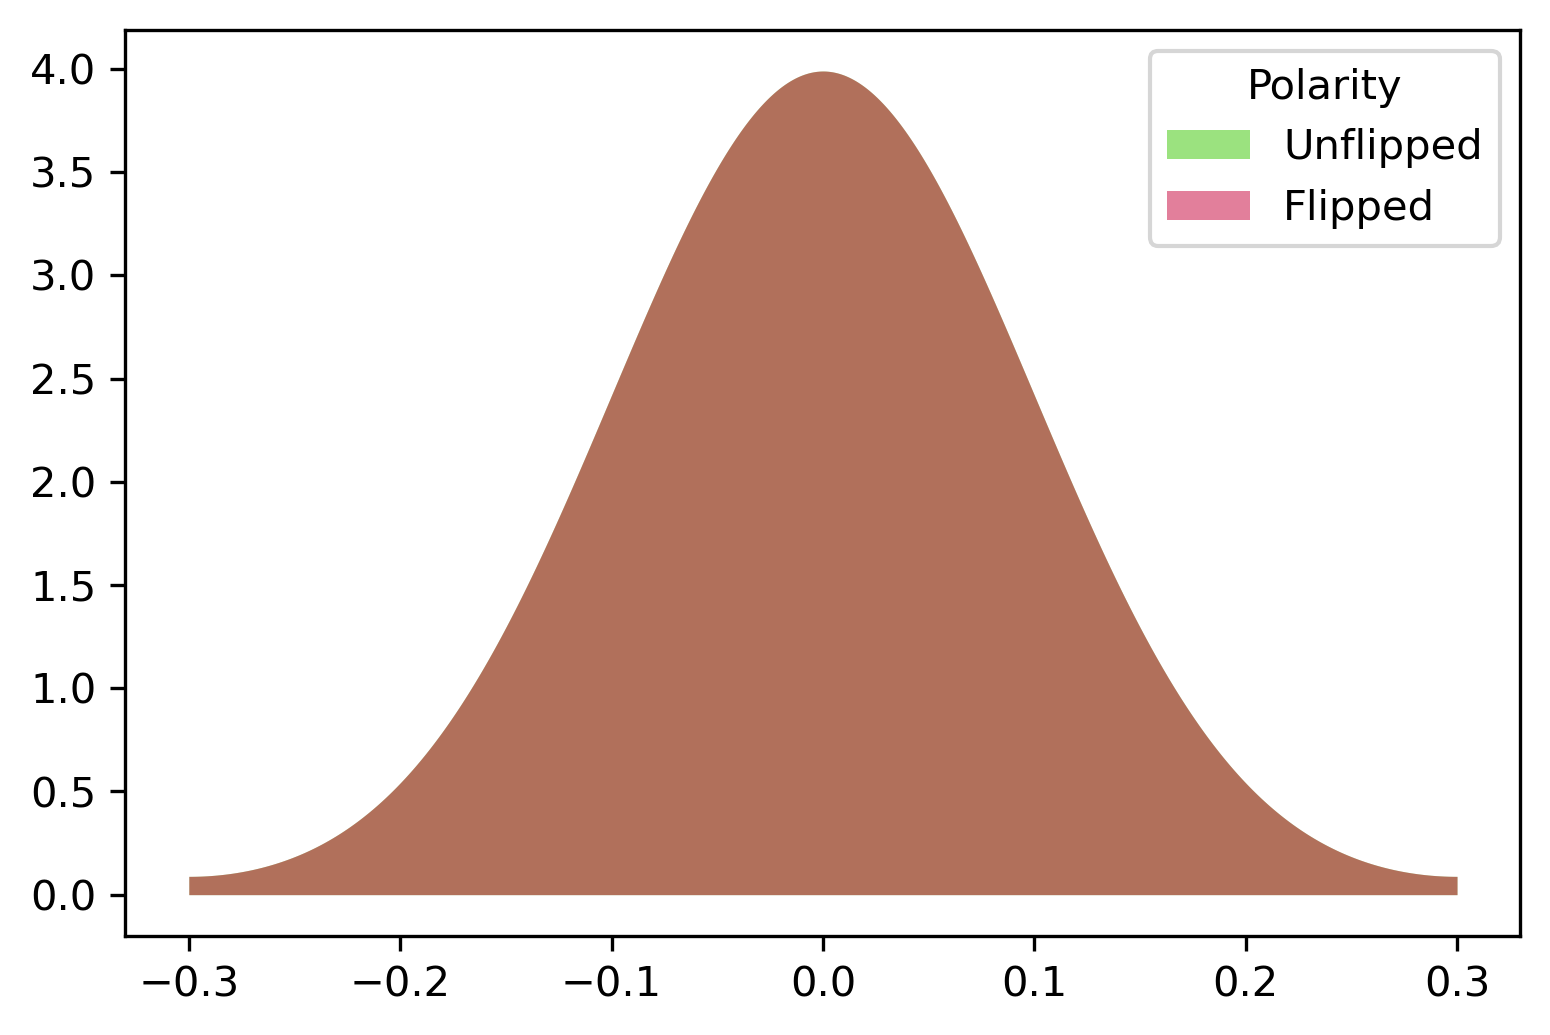

In [17]:
bw = 0.1

unflipped_kde = sm.nonparametric.KDEUnivariate(data.loc[data.polarity == 0].peak_amp_base.values)
flipped_kde = sm.nonparametric.KDEUnivariate(data.loc[data.polarity == 1].peak_amp_base.values)
unflipped_kde.fit(bw=bw)
flipped_kde.fit(bw=bw)

f, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)

ax.fill_between(unflipped_kde.support, 0, unflipped_kde.density, lw=0, color="#39C700", label="Unflipped", alpha=0.5, rasterized=True)
ax.fill_between(flipped_kde.support, 0, flipped_kde.density, lw=0, color="#C70039", label="Flipped", alpha=0.5, rasterized=True)

ax.legend(title="Polarity")

plt.savefig("/home/mszul/datasets/explicit_implicit_beta/derivatives/PCA_results/images/polarity_peak_amp_kde.svg")